In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('economic_index.csv')

In [ ]:
df.head(3)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357


In [ ]:
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [ ]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


What is index price?

Index price is a normalized average (typically a weighted average) of price relatives for a given class of goods or services in a specific region over a defined time period.

Two main factors that influence this are unemployment rate and interest rate

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [ ]:
df.isnull().sum() #no nulls

,0
interest_rate,0
unemployment_rate,0
index_price,0


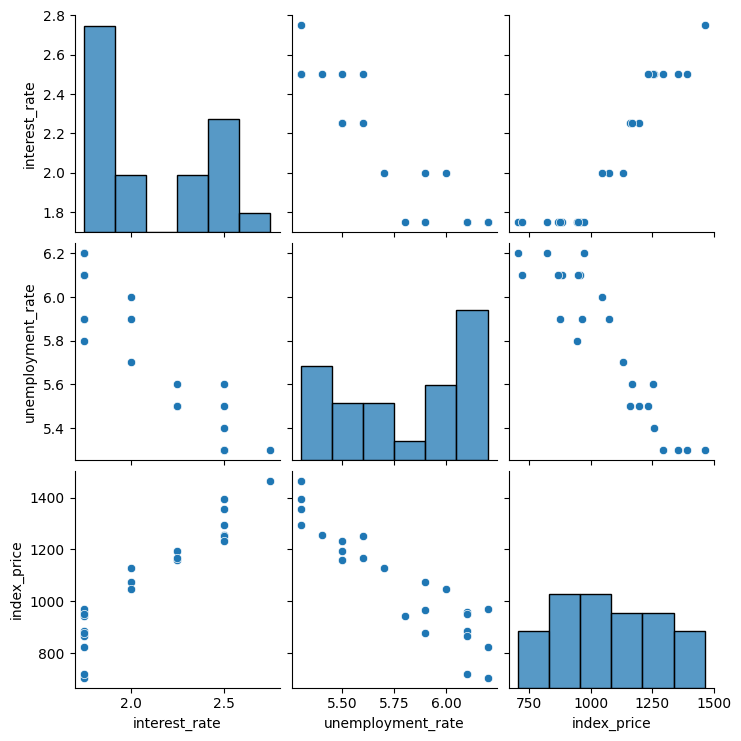

In [ ]:
 # Visualization to understand data
 sns.pairplot(df)

In [ ]:
#sns.heatmap(df.corr(),annot=True)
df.corr()

# Inference:
# Index price and interest rate are directly proportional
# Index price and unemployment rate are inversely proportional

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

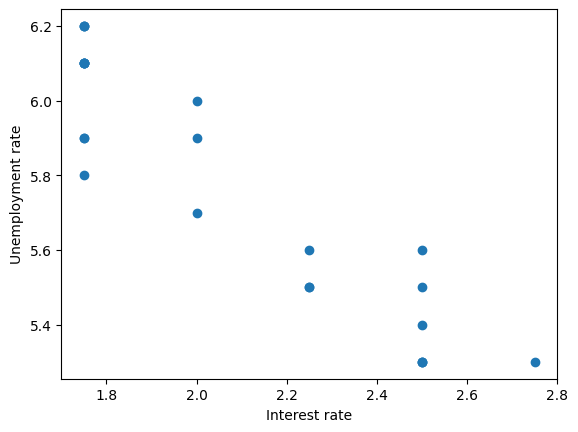

In [ ]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])

plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [ ]:
df.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [ ]:
# Independent and dependent feature
X=df[['interest_rate', 'unemployment_rate']] ## or df.iloc[:,:-1]
y=df['index_price'] #or  df.iloc[:,[-1]]

<Axes: xlabel='interest_rate', ylabel='index_price'>

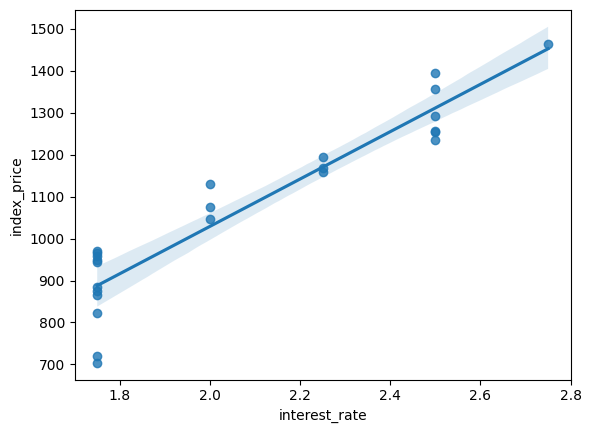

In [ ]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])
#Gives you an idea of the regression lie that is likely to be created

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [ ]:
# Apply multiple linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression= LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

# Cross-validation

in multiple linear regression is a resampling technique to assess how well the model generalizes to new data, preventing overfitting by splitting your dataset into multiple 'folds,' training on some, and testing on the rest, repeating the process and averaging the results for an unbiased performance estimate. It helps evaluate model accuracy and compare different models or hyperparameters by ensuring performance isn't just luck on one random train-test split, especially crucial for smaller datasets where data is precious.


```
# This is formatted as code
```


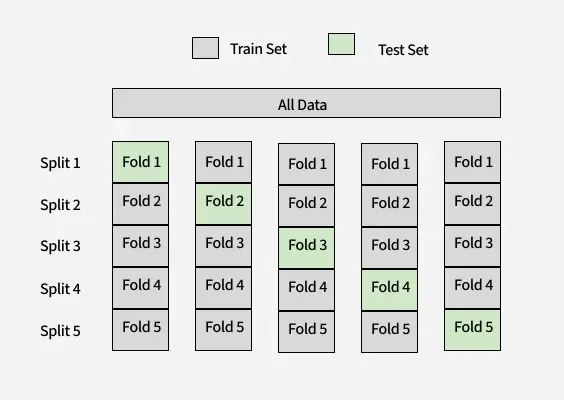


In [ ]:
from sklearn.model_selection import cross_val_score
validation_score= cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)
#model,x train, y train, scoring parameter, cross validation (a number) --for folds

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
print("Validation scores: ",validation_score)
print("-----------------------------")
print("Average of the 3 validation scores: ")
np.mean(validation_score)

Validation scores:  [-4921.61331265 -7686.87497294 -5135.9962549 ]
-----------------------------
Average of the 3 validation scores: 


np.float64(-5914.828180162392)

In [ ]:
# Prediction
y_pred= regression.predict(X_test)

In [ ]:
print(y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse)

mae= mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

rmse= np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

Mean Squared Error:  5793.762887712585
Mean Absolute Error:  59.93578152323556
Root Mean Squared Error:  76.11677139574816


In [ ]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
print("R Squared score: ",score*100,'%')

R Squared score:  82.78978091457141 %


In [ ]:
#Adjusted r squared error
adjusted_r2_error= 1- (1 - score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)

In [ ]:
print(adjusted_r2_error)

0.7131630152428567


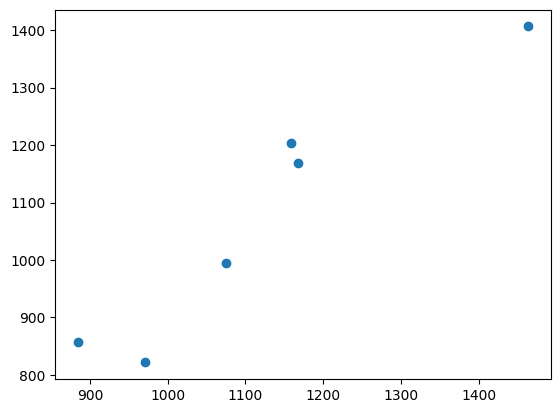

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
# Residuals -- aka errors
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


/tmp/ipython-input-1595010144.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

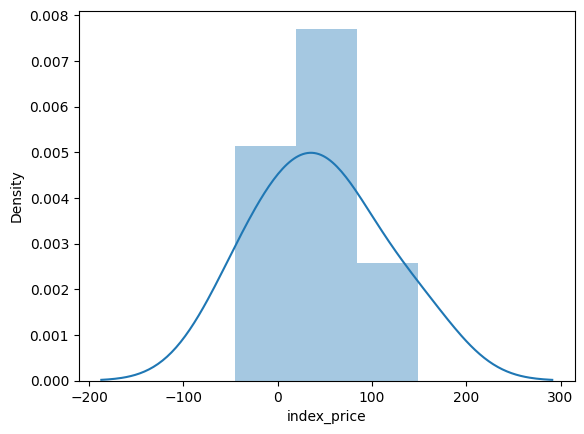

In [ ]:
#Plot the residuals
sns.distplot(residuals,kde=True)
# If the curve is normal distribution plot then the model that you have created is correct

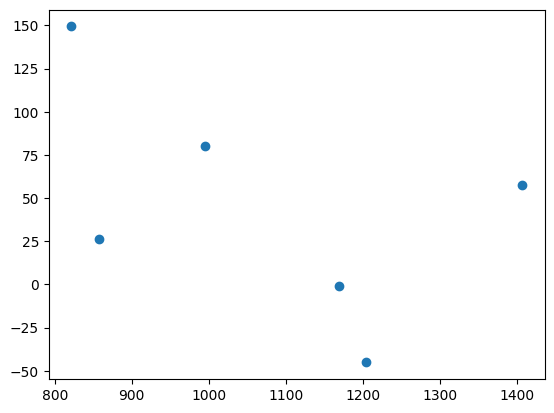

In [ ]:
#Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

# Here, data is uniform distributed ie. it does not follow any pattern

In [ ]:
# Ordinary least square
import statsmodels.api as sm


In [ ]:
model=sm.OLS(y_train,X_train).fit()


In [ ]:
prediction = model.predict(X_test)
prediction

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 22 Dec 2025   Prob (F-statistic):                       0.754
Time:                        17:45:29   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Assuming 'model' is your fitted statsmodels result object (e.g., after model.fit())
coefficients = model.params
print(coefficients)

x1     88.272755
x2   -116.257161
dtype: float64


In [ ]:
cols=['interest_rate','unemployment_rate']
model.model.exog_names[:] = cols

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 22 Dec 2025   Prob (F-statistic):                       0.754
Time:                        17:48:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate        88.2728    658.295      0.134      0.895   -1307.250    1483.796
unemployment_rate  -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""